#### Steps to Build a Machine Learning Model 


    1. Understanding Objective and gathering Domain knowledge
    2. Gather Data & Aggregate Data in Structure Format (Data Frame)
    3. Exploratory Data Analysis
    4. Data Preprocessing using Data Pipelines for machine learning model 
        Fixing Outliers 
        Fixing Missing Values
        Scaling Data
        Transforming non-numerical Data into numerical Data
        Feature Engineering - new features add using existing feature or drop some irrelvent features (feature selection)
    5. Select and Train Machine Learning Model
    6. Evaluation and Error Analaysis (Performance Measurement)
    7. Hyper-parameter Tunining to Improve Performance of ML model 
    8. Deployment (Lanuch), Monitoring, and Mantinance of ML model   
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)
# data/ -> train / val / test

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


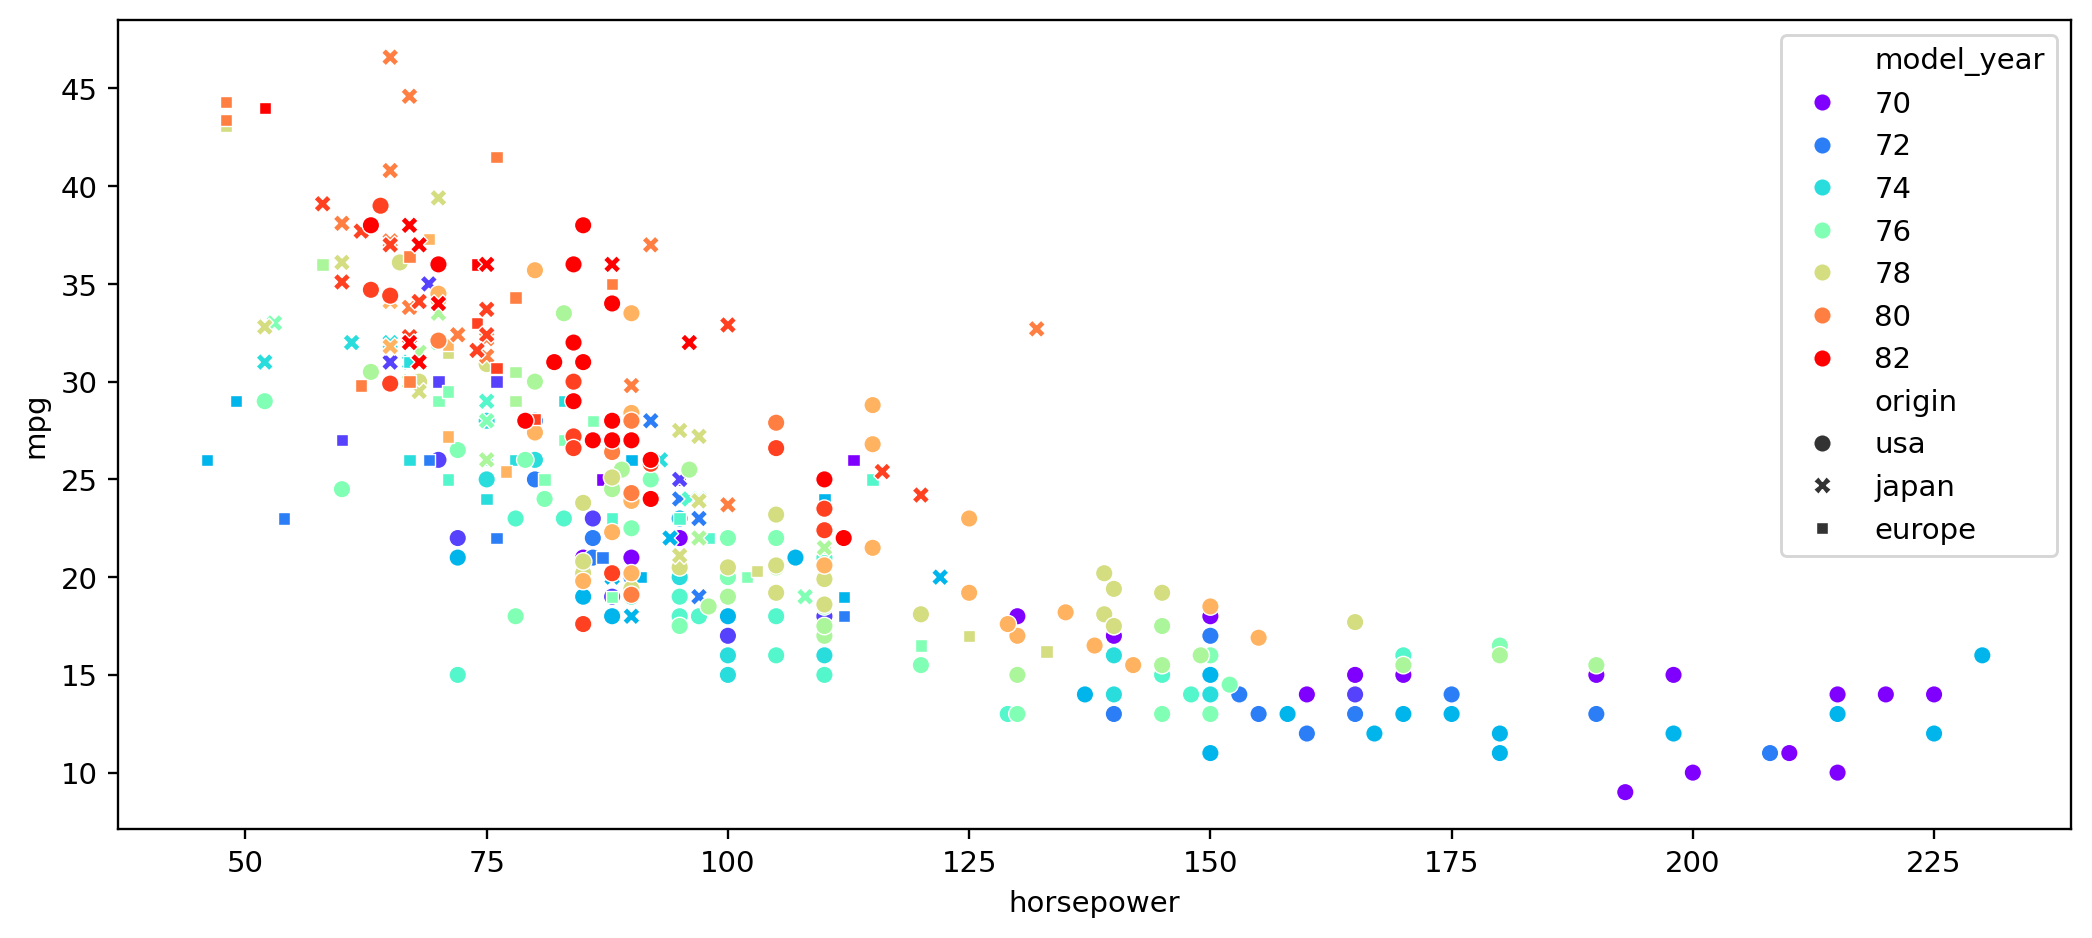

In [4]:
plt.figure(figsize=(12, 5), dpi=210)
sns.scatterplot(x="horsepower", y="mpg", data=mpg,
               hue="model_year", palette="rainbow", 
                style="origin")
plt.show()

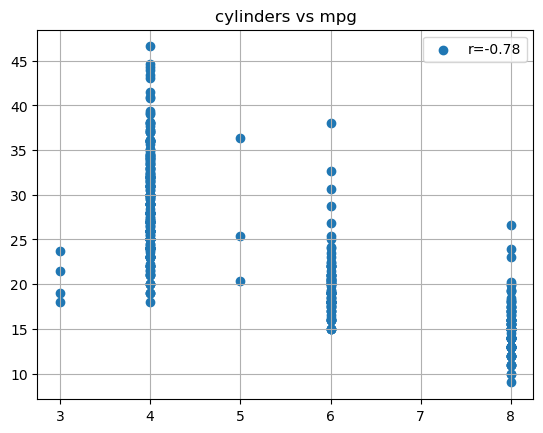

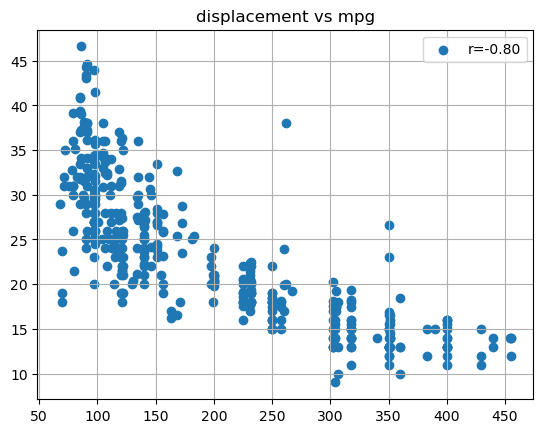

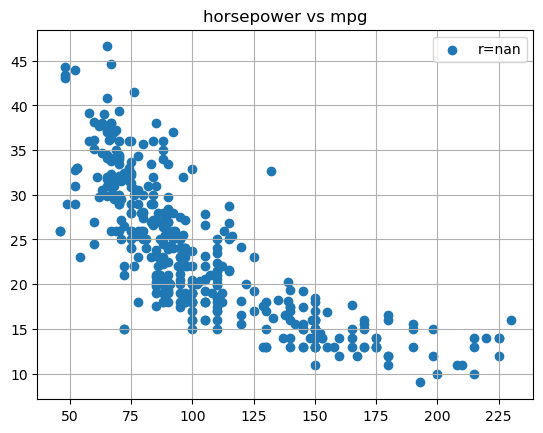

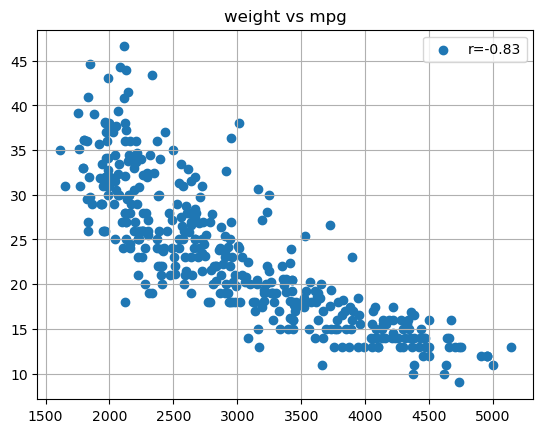

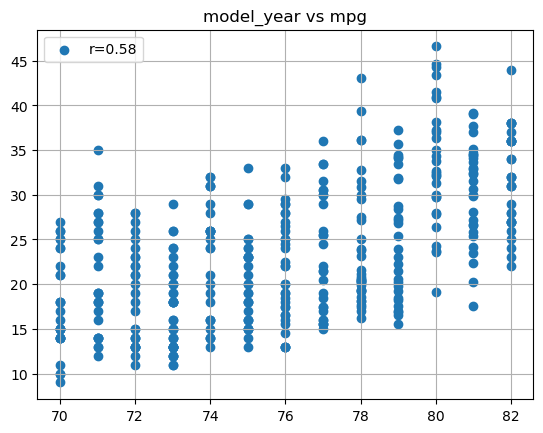

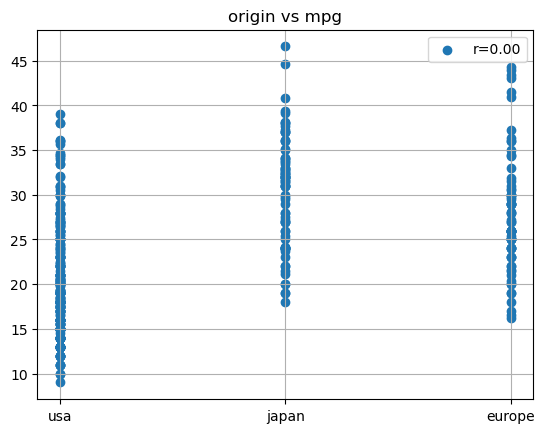

In [8]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'model_year', 'origin']
target = "mpg"
for f in features:
    try: 
        r = np.corrcoef(mpg[f], mpg[target])[0, 1]
    except:
        r = 0.00
    plt.title(f"{f} vs mpg")
    plt.scatter(f, target, data=mpg, label=f'r={r:.2f}')
    plt.legend()
    plt.grid()
    plt.show()

### Stratified Sampling 

    spliting data according most important features such that proportion of feature categories are equal in both train and test data set

In [9]:
features

['cylinders', 'displacement', 'horsepower', 'weight', 'model_year', 'origin']

In [54]:
X = mpg.drop('mpg', axis=1)
y = mpg['mpg'] # label

Train, Validation, Test

In [128]:
# Train - Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Test data represents -  real world data / live data

### Data Preprocessing

    outlier removal
    missing values
    encoding of categorical columns to numerical (oridinal/label)
    scaling
    feature engineering 

In [129]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
74,8,302.0,140.0,4294,16.0,72,usa,ford gran torino (sw)
326,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
13,8,455.0,225.0,3086,10.0,70,usa,buick estate wagon (sw)
92,8,351.0,158.0,4363,13.0,73,usa,ford ltd
187,8,305.0,140.0,4215,13.0,76,usa,chevrolet chevelle malibu classic


In [130]:
X_train['brand name'] = X_train['name'].apply(lambda car_name: car_name.split()[0].lower().strip())

In [131]:
X_train['brand name'].sort_values().unique()
# 

array(['amc', 'audi', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chevy',
       'chrysler', 'datsun', 'dodge', 'fiat', 'ford', 'hi', 'honda',
       'maxda', 'mazda', 'mercedes', 'mercedes-benz', 'mercury', 'nissan',
       'oldsmobile', 'opel', 'peugeot', 'plymouth', 'pontiac', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'triumph', 'vokswagen',
       'volkswagen', 'volvo', 'vw'], dtype=object)

In [132]:
def correct_names(name):
    if name in ['vokswagen' ,'volkswagen']:
        name = 'vw'
    elif name in ['mercedes', 'mercedes-benz']:
        name = 'mercedes'
    elif name in ['maxda', 'mazda']:
        name = 'mazda'
    elif name in ['chevrolet', 'chevy']:
        name = 'chevrolet'
    else:
        name = name
    return name

In [133]:
X_train['brand name'] = X_train['brand name'].apply(correct_names)

In [134]:
X_train['brand name'].nunique()

30

In [135]:
X_train['brand name'].unique()

array(['ford', 'vw', 'buick', 'chevrolet', 'volvo', 'dodge', 'toyota',
       'plymouth', 'toyouta', 'oldsmobile', 'mazda', 'datsun', 'mercedes',
       'bmw', 'mercury', 'amc', 'subaru', 'pontiac', 'triumph', 'honda',
       'fiat', 'audi', 'chrysler', 'saab', 'hi', 'peugeot', 'nissan',
       'opel', 'cadillac', 'renault'], dtype=object)

In [136]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'name', 'brand name'],
      dtype='object')

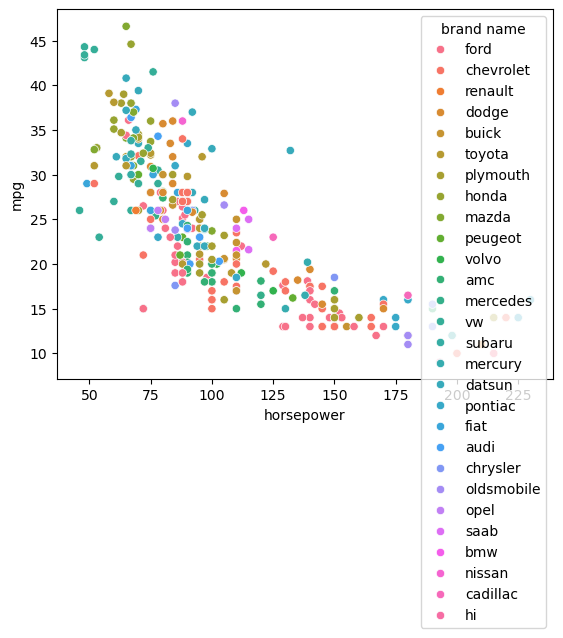

In [77]:
# feature engineering
sns.scatterplot(x=X_train['horsepower'], y=y_train, hue=X_train['brand name'])
plt.show()

In [81]:
X_train['brand name'].head()

373         ford
213    chevrolet
330      renault
314         ford
121        dodge
Name: brand name, dtype: object

In [82]:
y_train.head()

373    24.0
213    13.0
330    40.9
314    26.4
121    15.0
Name: mpg, dtype: float64

In [83]:
new_data = pd.concat([X_train['brand name'], y_train], axis=1)
new_data.head()

,brand name,mpg
373,ford,24.0
213,chevrolet,13.0
330,renault,40.9
314,ford,26.4
121,dodge,15.0


In [85]:
new_data.groupby('brand name')['mpg'].describe().style.background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
brand name,,,,,,,,
amc,21.000000,19.114286,3.250275,14.000000,18.000000,19.000000,20.200000,27.400000
audi,6.000000,26.333333,7.181550,20.000000,20.975000,23.500000,31.725000,36.400000
bmw,2.000000,23.750000,3.181981,21.500000,22.625000,23.750000,24.875000,26.000000
buick,11.000000,20.281818,5.639649,13.000000,15.500000,20.600000,23.700000,30.000000
cadillac,2.000000,19.750000,4.596194,16.500000,18.125000,19.750000,21.375000,23.000000
chevrolet,35.000000,19.437143,6.255496,10.000000,15.000000,17.500000,24.250000,34.000000
chrysler,5.000000,18.120000,4.888456,13.000000,15.500000,17.600000,18.500000,26.000000
datsun,19.000000,31.336842,5.864792,22.000000,27.100000,32.000000,36.000000,40.800000
dodge,26.000000,22.465385,7.701529,11.000000,15.625000,20.300000,28.000000,36.000000


In [88]:
# accuracy ? 
new_data.groupby('brand name')['mpg'].median().sort_values()
# important feature
# One Hot Encoding -> Oridinal Encoding --> Limited
# Label Encoding -> Nominal encoding --> a lot of categories

brand name
hi             9.00
mercury       15.75
chevrolet     17.50
chrysler      17.60
ford          18.50
pontiac       18.50
amc           19.00
cadillac      19.75
volvo         20.00
dodge         20.30
buick         20.60
peugeot       22.00
plymouth      22.00
audi          23.50
bmw           23.75
oldsmobile    23.80
saab          24.50
mercedes      25.40
opel          25.50
toyota        28.00
fiat          28.50
vw            30.15
subaru        31.15
datsun        32.00
honda         33.35
mazda         34.10
renault       34.50
nissan        36.00
Name: mpg, dtype: float64

In [57]:
#help(mpg.style.background_gradient)

### Linear Regression 

    linear reletionship between features and target 

    Hypothesis Function / Prediction Function
    
        mpg = w1*horsepower + w2*displacement + w3*weight + w4*model_year + w5*cylinders + b
        

In [89]:
X_train.describe().style.background_gradient(cmap='coolwarm')
# some ML model sensitive to features magnitude or scaling

,cylinders,displacement,horsepower,weight,acceleration,model_year
count,318.000000,318.000000,313.000000,318.000000,318.000000,318.000000
mean,5.421384,190.850629,103.159744,2948.996855,15.582704,76.122642
std,1.693870,102.898148,37.779726,844.332542,2.695489,3.739219
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,105.000000,75.000000,2220.000000,14.000000,73.000000
50%,4.000000,144.500000,92.000000,2789.500000,15.500000,76.000000
75%,8.000000,261.500000,125.000000,3554.750000,17.000000,79.000000
max,8.000000,455.000000,230.000000,5140.000000,24.600000,82.000000


## Scaling

    making each feature range simliar all other features

    Min-Max Scaling

    Standard Scaling 


0 - 1 

In [90]:
10 / 230

0.043478260869565216

In [91]:
max(X_train['horsepower'])

230.0

In [92]:
def min_max_scale(array):
    min_ = min(array)
    max_ = max(array)
    return (array - min_) / (max_ - min_)

In [93]:
min_max_scale(X_train['cylinders'].to_numpy())

array([0.2, 1. , 0.2, 0.2, 1. , 1. , 0.2, 1. , 0.2, 0.2, 0.2, 1. , 0.2,
       0.2, 0.2, 0.2, 1. , 1. , 0.2, 0.2, 1. , 0.2, 0.4, 0.2, 1. , 1. ,
       0.2, 0.2, 0.2, 1. , 0.2, 1. , 1. , 0.2, 0.2, 0.6, 0.2, 0.2, 0.6,
       0.2, 0.2, 0.2, 0.6, 0.6, 1. , 1. , 1. , 0.6, 0.6, 0.6, 0.2, 0.6,
       0.2, 0.2, 0.2, 1. , 0.2, 0.2, 0.2, 0.2, 1. , 0.2, 1. , 0.2, 0.6,
       0.2, 1. , 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.6, 0.6, 0.2,
       1. , 0.6, 0.6, 0.6, 0.2, 0.2, 1. , 1. , 0.2, 0.2, 0.2, 1. , 0.2,
       0.6, 1. , 0.6, 1. , 0.2, 0.2, 0.6, 1. , 0.2, 0.2, 0.2, 1. , 0.2,
       0.2, 1. , 0.6, 0.2, 0.6, 0.2, 0.2, 0.6, 0.2, 1. , 0.2, 0.2, 1. ,
       1. , 0.2, 1. , 0.2, 0.2, 1. , 1. , 0.6, 1. , 1. , 0.2, 0.2, 1. ,
       1. , 1. , 0.6, 0.4, 0.2, 1. , 0.6, 0.2, 1. , 0.6, 0.6, 0.2, 0.2,
       1. , 0.6, 0.6, 0.2, 0.2, 0.6, 0.2, 0.2, 1. , 0.2, 0.2, 1. , 0.2,
       0.6, 1. , 0.2, 1. , 0.2, 1. , 0.6, 1. , 0.2, 0.6, 0.2, 0.6, 0.6,
       1. , 1. , 0.2, 1. , 1. , 1. , 0.2, 1. , 0.2, 0.2, 1. , 0.

In [94]:
a = (X_train['horsepower'] - X_train.horsepower.min()) / (X_train.horsepower.max() - X_train.horsepower.min())# 0 - 1   min - 0   max - 1
# (max-min)

In [95]:
a.describe()

count    313.000000
mean       0.310651
std        0.205325
min        0.000000
25%        0.157609
50%        0.250000
75%        0.429348
max        1.000000
Name: horsepower, dtype: float64

In [96]:
X_train['horsepower'].describe()

count    313.000000
mean     103.159744
std       37.779726
min       46.000000
25%       75.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

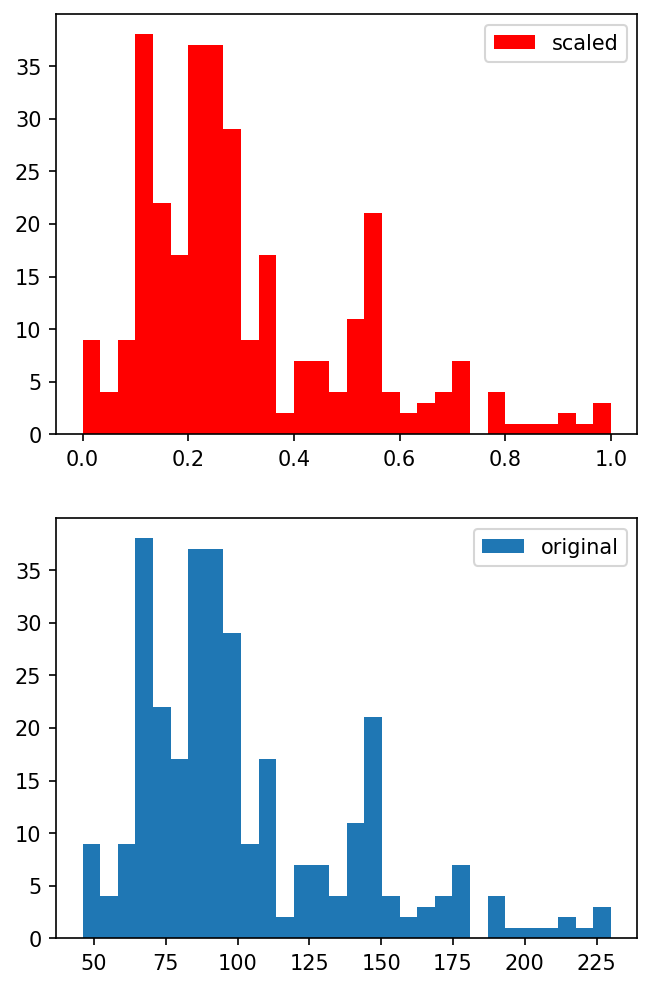

In [97]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=150, figsize=(5, 8))

ax1.hist(a, bins=30, label='scaled', color='red')
ax2.hist(X_train.horsepower, bins=30, label='original')
ax1.legend()
ax2.legend()
plt.show()

$$ Scaled \quad X_i = \frac  {X_i - MIN(X)} {MAX(X) - MIN(X)}  $$

In [98]:
features

['cylinders', 'displacement', 'horsepower', 'weight', 'model_year', 'origin']

In [99]:
num_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'model_year']
cat_features = ['origin']

In [100]:
from sklearn.preprocessing import MinMaxScaler
# transformer --> fit, transform

In [101]:
scaler = MinMaxScaler()
X_train_num_tr = scaler.fit_transform(X_train[num_features])
# fit -> learn -> minimum, maximum
# note: fit, fit_transform should be used only with training data

In [102]:
scaler.data_max_ # learning parameters 

array([   8.,  455.,  230., 5140.,   82.])

In [103]:
scaler.data_min_

array([   3.,   68.,   46., 1613.,   70.])

In [104]:
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=num_features)
X_train_num_tr.head()

,cylinders,displacement,horsepower,weight,model_year
0,0.2,0.186047,0.250000,0.354976,1.000000
1,1.0,0.728682,0.538043,0.692373,0.500000
2,0.2,0.043928,NaN,0.062943,0.833333
3,0.2,0.186047,0.228261,0.356394,0.833333
4,1.0,0.645995,0.565217,0.506379,0.250000


In [105]:
X_train_num_tr.describe()

,cylinders,displacement,horsepower,weight,model_year
count,318.000000,318.000000,313.000000,318.000000,318.000000
mean,0.484277,0.317443,0.310651,0.378791,0.510220
std,0.338774,0.265887,0.205325,0.239391,0.311602
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.095607,0.157609,0.172101,0.250000
50%,0.200000,0.197674,0.250000,0.333570,0.500000
75%,1.000000,0.500000,0.429348,0.550539,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
a = np.array([1, 2, 3, 4, 5, 100])
min_max_scale(a)

array([0.  , 0.01, 0.02, 0.03, 0.04, 1.  ])

#### Standard Scaler

    convert each feature into standard normal distribution 

        if mean = 0  std = 1 than normal distribution is known as standard normal distribution 

In [107]:
X_train["horsepower"].describe()

count    313.000000
mean     103.159744
std       37.779726
min       46.000000
25%       75.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [108]:
a = (X_train['horsepower'] - X_train['horsepower'].mean())

In [109]:
a.describe() # mean = 0, std = 1 ?  

count    3.130000e+02
mean     1.452867e-15
std      3.777973e+01
min     -5.715974e+01
25%     -2.815974e+01
50%     -1.115974e+01
75%      2.184026e+01
max      1.268403e+02
Name: horsepower, dtype: float64

In [110]:
#pd.set_option(precision=2)

In [111]:
np.set_printoptions(precision=2)

In [112]:
(a / a.std()).describe()

count    3.130000e+02
mean     7.377840e-17
std      1.000000e+00
min     -1.512974e+00
25%     -7.453666e-01
50%     -2.953898e-01
75%      5.780946e-01
max      3.357363e+00
Name: horsepower, dtype: float64

## Standard Scaler

$$ Standard Scaled \quad X_i = \frac {X_i - \bar X} {\sigma_X} $$

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
print(*num_features)

cylinders displacement horsepower weight model_year


In [116]:
scaler.fit(X_train[num_features])

StandardScaler()

In [117]:
scaler.mean_

array([   5.42,  190.85,  103.16, 2949.  ,   76.12])

In [118]:
scaler.var_

array([2.86e+00, 1.06e+04, 1.42e+03, 7.11e+05, 1.39e+01])

In [119]:
X_train_num_tr = pd.DataFrame(scaler.transform(X_train[num_features]), columns=num_features)

In [120]:
X_train_num_tr.head()

,cylinders,displacement,horsepower,weight,model_year
0,-0.840457,-0.494963,-0.295863,-0.099640,1.574292
1,1.524722,1.549107,1.109252,1.311979,-0.032850
2,-0.840457,-1.030315,NaN,-1.321461,1.038578
3,-0.840457,-0.494963,-0.401909,-0.093709,1.038578
4,1.524722,1.237629,1.241810,0.533809,-0.836421


In [121]:
X_train_num_tr.describe()

,cylinders,displacement,horsepower,weight,model_year
count,3.180000e+02,3.180000e+02,3.130000e+02,3.180000e+02,3.180000e+02
mean,-4.468822e-17,2.793014e-17,6.242788e-17,-1.564088e-16,2.262341e-16
std,1.001576e+00,1.001576e+00,1.001601e+00,1.001576e+00,1.001576e+00
min,-1.431751e+00,-1.195787e+00,-1.515397e+00,-1.584805e+00,-1.639993e+00
25%,-8.404565e-01,-8.356412e-01,-7.465601e-01,-8.647609e-01,-8.364215e-01
50%,-8.404565e-01,-4.511615e-01,-2.958628e-01,-1.892006e-01,-3.285039e-02
75%,1.524722e+00,6.876773e-01,5.790203e-01,7.185650e-01,7.707207e-01
max,1.524722e+00,2.571141e+00,3.362739e+00,2.599043e+00,1.574292e+00


    Range - u = 0, std = 1     -3 to + 3

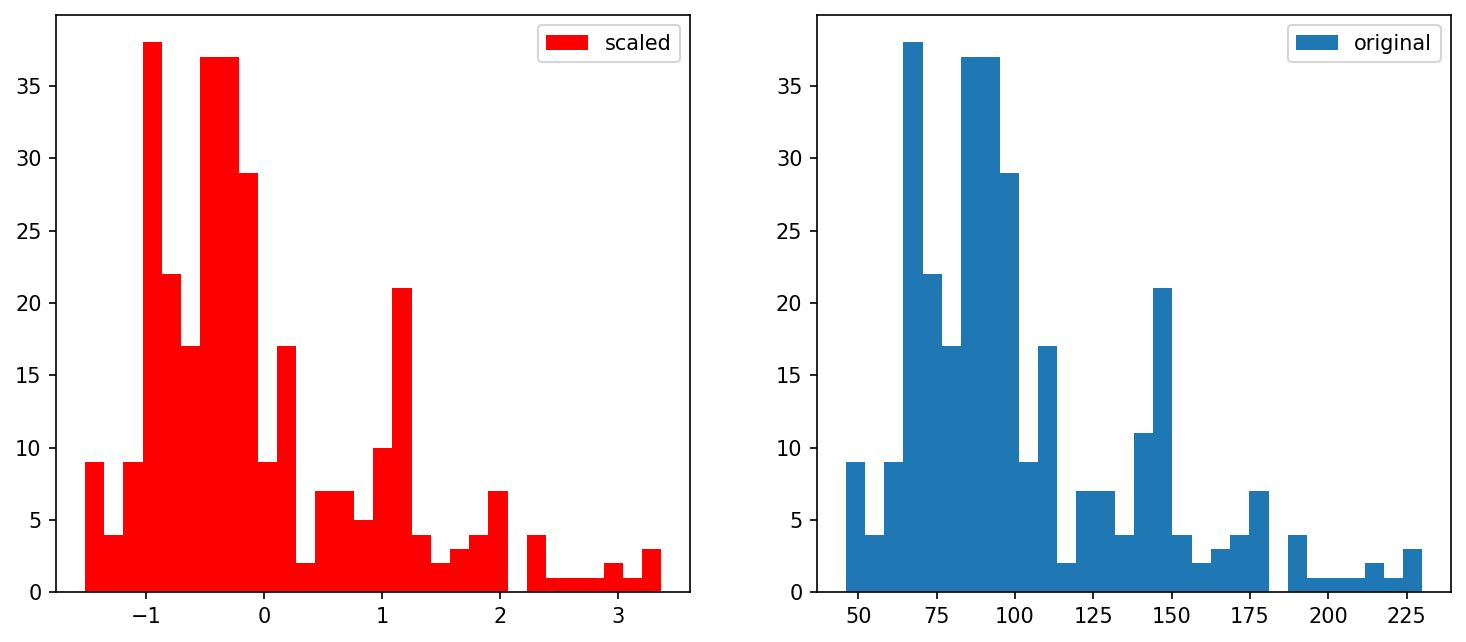

In [122]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(12, 5))

ax1.hist(X_train_num_tr.horsepower, bins=30, label='scaled', color='red')
ax2.hist(X_train.horsepower, bins=30, label='original')
ax1.legend()
ax2.legend()
plt.show()

### Scaling ? 

### Data Modeling

    outlier removal
    missing value impute
    scale
    cat encoding

In [137]:
from sklearn.pipeline import Pipeline
# ecapsulate transformers in sequential order
from sklearn.preprocessing import StandardScaler
# scale data
from sklearn.impute import SimpleImputer
# deal with missing values
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# Category data to numerical array

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [143]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'name', 'brand name'],
      dtype='object')

In [145]:
num_features = [ 'displacement', 'horsepower', 'weight', ]
nominal_cat_features = ['origin'] 
ordinal_cat_features = ['model_year', 'cylinders'] # 'brand name'

In [146]:
X_train.cylinders.unique()
# 3 - 0 4 - 1 5 - 2 6 - 3 8 - 4  #0-1

array([8, 6, 4, 5, 3])

In [150]:
X_train.model_year.sort_values().unique()
# 70- 0, 71 - 2 , 72-2, ..... # 0 - 10 -> -3, 3

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [151]:
num_pipeline = Pipeline([
    ("fix_na", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()) # -3, 3
])

nom_cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder()) # 0/1
])
ord_cat_pipeline = Pipeline([
    ("encoder", OrdinalEncoder()),
    ("scaler", StandardScaler())  
])

In [183]:
num_pipeline.fit(X_train_num)

Pipeline(steps=[('fix_na', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])

In [184]:
cat_pipeline.fit(X_train_cat)

Pipeline(steps=[('encoder', OneHotEncoder())])

In [185]:
X_train_num_tr = num_pipeline.transform(X_train_num)
X_train_cat_tr = cat_pipeline.transform(X_train_cat)

In [186]:
X_train_num_tr = pd.DataFrame(X_train_num_tr, columns=X_train_num.columns)
X_train_num_tr.head()

,cylinders,displacement,horsepower,weight,model_year
0,0.275973,0.482515,0.084955,0.586663,0.279540
1,0.275973,0.482515,-0.170111,0.301956,-0.812815
2,1.425106,2.280884,2.763150,2.016081,-0.812815
3,-0.873160,-1.022436,-1.368922,-1.442757,-0.266638
4,1.425106,1.429025,1.232753,1.574902,0.825717


In [187]:
num_pipeline.named_steps['fix_na'].statistics_

array([   4.,  151.,   95., 2860.,   76.])

In [188]:
num_pipeline.named_steps['scaling'].mean_

array([   5.52,  199.02,  106.67, 3021.34,   75.98])

In [189]:
num_pipeline.named_steps['scaling'].var_

array([3.03e+00, 1.12e+04, 1.54e+03, 7.22e+05, 1.34e+01])

In [190]:
cat_pipeline.named_steps['encoder'].categories_
# ([europe, japan, usa), (3, 4, 5, 6, 8) )


[array(['europe', 'japan', 'usa'], dtype=object)]

In [152]:
def get_categories(cats):
    cat = []
    for arr in cats:
        cat.extend(list(map(str, arr)))
    return cat

In [192]:
cat_cols = get_categories(cat_pipeline.named_steps['encoder'].categories_)

In [193]:
X_train_cat_tr = pd.DataFrame(X_train_cat_tr.toarray(), columns=cat_cols)

In [194]:
X_train_cat_tr.head()

,europe,japan,usa
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [195]:
X_train_num_tr.head()

,cylinders,displacement,horsepower,weight,model_year
0,0.275973,0.482515,0.084955,0.586663,0.279540
1,0.275973,0.482515,-0.170111,0.301956,-0.812815
2,1.425106,2.280884,2.763150,2.016081,-0.812815
3,-0.873160,-1.022436,-1.368922,-1.442757,-0.266638
4,1.425106,1.429025,1.232753,1.574902,0.825717


In [153]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [156]:
num_features = [ 'displacement', 'horsepower', 'weight', ]
nominal_cat_features = ['origin'] 
ordinal_cat_features = ['model_year', 'cylinders'] # 'brand name'

In [154]:
num_pipeline = Pipeline([
    ("fix_na", SimpleImputer(strategy='median')),
    ("scaler", StandardScaler()) # -3, 3
])

nom_cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder()) # 0/1
])
ord_cat_pipeline = Pipeline([
    ("encoder", OrdinalEncoder()),
    ("scaler", StandardScaler())  
])

In [162]:
pipeline = ColumnTransformer([
    ("numerical", num_pipeline, num_features),
    ("nom cat", nom_cat_pipeline, nominal_cat_features),
    ("ord cat", ord_cat_pipeline, ordinal_cat_features)
    ])
# drop, passthrough

In [163]:
pipeline

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('fix_na',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['displacement', 'horsepower', 'weight']),
                                ('nom cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['origin']),
                                ('ord cat',
                                 Pipeline(steps=[('encoder', OrdinalEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 ['model_year', 'cylinders'])])

In [164]:
pipeline.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('fix_na',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['displacement', 'horsepower', 'weight']),
                                ('nom cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['origin']),
                                ('ord cat',
                                 Pipeline(steps=[('encoder', OrdinalEncoder()),
                                                 ('scaler', StandardScaler())]),
                                 ['model_year', 'cylinders'])])

In [167]:
cols = num_features + ["europe", "japan", "usa"] + ["model_year", "cylinders"]

In [168]:
X_train_tr = pipeline.transform(X_train)
X_train_tr = pd.DataFrame(X_train_tr, columns=cols)

In [169]:
X_train_tr.head()

,displacement,horsepower,weight,europe,japan,usa,model_year,cylinders
0,1.529532,0.046673,0.900898,0.0,0.0,1.0,1.374981,1.393701
1,0.318992,0.046673,0.193590,0.0,0.0,1.0,-0.801002,0.630770
2,-1.104604,-1.346488,-1.136710,0.0,1.0,0.0,0.558988,-0.895093
3,-0.978707,-0.925911,-1.136710,0.0,1.0,0.0,1.374981,-0.895093
4,-0.397648,-0.505334,-0.375535,0.0,0.0,1.0,1.374981,-0.895093


### ML models 

    supervise - LinearRegression, KNN, SVM, Decision Tree, Random Forest, XGboosts

    what do you mean by fitting a ML model ? 
    
    what is learning in machine learning ? 

        type of ML models 

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # ? 

In [177]:
model = LinearRegression()
model1 = RandomForestRegressor()

In [178]:
model.fit(X_train_tr, y_train) # Training

LinearRegression()

In [179]:
model1.fit(X_train_tr, y_train)

RandomForestRegressor()

     mpg = w1*horsepower + w2*displacement + w3*weight + w4*model_year + w5*cylinders + b

In [173]:
print(*X_train_tr.columns)

displacement horsepower weight europe japan usa model_year cylinders


In [174]:
model.coef_

array([ 2.15, -0.67, -5.56,  1.33,  0.88, -2.21,  3.11, -0.8 ])

In [175]:
model.intercept_ # bias --> randomness

24.720309330613443

# Evalute the Model


    error -> actual - predicted value 

    Mean Squared Error 

$$MSE =  \frac { \sum_{i=0}^n{(\hat y - y_i)}^2} {n-1}$$

    Root Mean Squared Error 

$$ RMSE = \sqrt {\frac { \sum_{i=0}^n{(\hat y - y_i)}^2} {n-1}} $$

In [180]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [195]:
X_val_tr = pipeline.transform(X_val)
X_val_tr = pd.DataFrame(X_val_tr, columns=cols)

In [197]:
X_test_tr = pipeline.transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns=cols)

### Cross Validation

In [206]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()

In [208]:
# Linear Regression

# X_train, y_train --> k fold --> train, val
model_mse = cross_val_score(model, X_train_tr, y_train, cv=5, scoring="r2") # accuacy # greater is better

In [209]:
model_mse

array([0.79, 0.83, 0.78, 0.84, 0.86])

In [214]:
# Linear Regression
model = LinearRegression()
# X_train, y_train --> k fold --> train, val
model_mse = cross_val_score(model, X_train_tr, y_train, cv=5, scoring="neg_mean_squared_error") # error  # lesser is better
abs(model_mse)

array([14.04,  9.8 , 13.46, 11.56,  9.21])

In [ ]:
# X_train, y_train --> k fold --> train, val
model_mse = cross_val_score(RandomForestRegressor(), X_train_tr, y_train, cv=5, scoring="r2") # accuacy # greater is better
print(model_mse)

In [215]:
model_mse = cross_val_score(RandomForestRegressor(), X_train_tr, y_train, cv=5, scoring="neg_mean_squared_error") # error  # lesser is better
print(abs(model_mse))

[ 9.94  5.81 11.87  6.64  5.35]


`model selection`

    finding best suitable model for your data - Linear Regression, SGD, DT, NB, KNN, SVM, RFG, XGBoost

    cv -> best cv

In [216]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [218]:
rows = {}
models = [LinearRegression(), SGDRegressor(), DecisionTreeRegressor(), SVR(), KNeighborsRegressor(), RandomForestRegressor()]
for model in models:
    cv_score = cross_val_score(model, X_train_tr, y_train, cv=5, scoring="neg_mean_squared_error")
    cv_score = abs(cv_score)
    rows[str(model)] = [min(cv_score), cv_score.mean(), np.median(cv_score), np.std(cv_score), max(cv_score)]

In [221]:
df = pd.DataFrame(rows, index=["min", "mean", "median", "std", "max"])
df.style.background_gradient(cmap='coolwarm')

,LinearRegression(),SGDRegressor(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor()
min,9.214398,9.121744,10.019020,8.016725,5.410592,5.969697
mean,11.612122,11.507084,14.641767,10.823815,8.752225,7.967903
median,11.555958,12.328604,14.025098,11.759590,7.934541,6.694584
std,1.915201,1.885886,3.638563,1.914749,2.740751,2.160116
max,14.038971,14.132226,20.141961,13.246485,12.967404,11.506661


In [222]:
# SGD Regressor 
# RandomForestRegressor 

In [199]:
print("Random Forest Model")
yt = model1.predict(X_train_tr) # random forest
print("Training Acc:   ", r2_score(y_train, yt))
ytt = model1.predict(X_val_tr)
print("Validation Acc: ", r2_score(y_val, ytt))
yr = model1.predict(X_test_tr)
print("Test Accuracy:  ", r2_score(y_test, yr))
# training acc >>> val/test accuracy ---> sign overfitting

Random Forest Model
Training Acc:    0.9822134787022923
Validation Acc:  0.8701451968289464
Test Accuracy:   0.8174773804050899


In [200]:
print("Linear Regression Model")
yt = model.predict(X_train_tr) # random forest
print("Training Acc:   ", r2_score(y_train, yt))
ytt = model.predict(X_val_tr)
print("Validation Acc: ", r2_score(y_val, ytt))
yr = model.predict(X_test_tr)
print("Test Accuracy:  ", r2_score(y_test, yr))
# if objective --> model 80% accuracy --> good fit
# objective -> 95% --> model is underfitting -> way to simple to predict

Linear Regression Model
Training Acc:    0.8371671746525445
Validation Acc:  0.8068818142141
Test Accuracy:   0.7804582912954756


### Cross Validations
### Hyper parameter tunning
### Deployment

In [203]:
from tqdm import tqdm
import time
break_time = 10*60
for i in tqdm(range(1, break_time+1)):
    time.sleep(1)
    #print(f"\rTime Remaining: {break_time-i:>5} seconds.", end="")

100%|█████████████████████████████████████████| 600/600 [10:04<00:00,  1.01s/it]


In [221]:
X_val_tr = pipeline.transform(X_val)

In [223]:
y_val_hat = model.predict(X_val_tr)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [224]:
y_val_hat

array([26.45, 16.86, 25.34, 30.49, 27.56, 20.69, 17.77, 16.88, 16.98,
       33.21, 16.27, 26.23, 10.72, 28.22, 11.23, 35.74, 21.39, 30.36,
       31.39, 24.48, 24.8 , 33.09, 29.52, 25.74, 31.23, 35.56, 26.61,
       19.33, 33.15, 23.57, 16.84,  9.89, 19.28, 30.81, 21.75, 22.28,
       14.97, 11.12, 28.24, 34.36, 22.17, 30.95, 30.62, 31.25, 10.7 ,
       29.19, 29.76, 32.92, 14.88, 32.48, 25.58, 11.18, 12.14, 21.39,
       25.45, 29.88, 24.92, 33.69, 20.65, 20.04, 13.67, 26.77, 29.61,
       34.97])

In [226]:
y_val.to_numpy()

array([25.5, 13. , 26.8, 36. , 20.3, 18. , 17.5, 18. , 17. , 34.1, 17. ,
       24. , 13. , 22. , 13. , 32. , 20.5, 34.7, 31.5, 20. , 28. , 34.5,
       29. , 20.2, 34.4, 29.8, 30. , 15. , 40.8, 26.6, 18. , 12. , 18. ,
       23.7, 20.6, 20. , 17. , 12. , 24.2, 33. , 23.9, 32. , 32. , 31. ,
       14. , 31. , 34. , 37.3, 17. , 29. , 25.4, 13. , 14. , 21. , 20. ,
       32.1, 27. , 36.1, 18. , 18.6, 15. , 28. , 29. , 40.9])

In [227]:
root_mean_squared_error(y_val, y_val_hat)

3.216266112785775

In [228]:
val_acc = r2_score(y_val, y_val_hat)

In [230]:
train_acc  # val acc <<< train acc --> underfit

0.829099053235093

In [229]:
val_acc

0.8325163215170122

In [232]:
X_test.head()

,cylinders,displacement,horsepower,weight,model_year,origin
150,4,108.0,93.0,2391,74,japan
42,8,383.0,180.0,4955,71,usa
120,4,121.0,112.0,2868,73,europe
102,4,97.0,46.0,1950,73,europe
293,4,89.0,71.0,1925,79,europe


In [236]:
X_test_tr = pipeline.transform(X_test)
y_test_hat = model.predict(X_test_tr)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [237]:
test_acc = r2_score(y_test, y_test_hat)

In [239]:
test_acc # underfits

0.7793112056232706

Machine Learning - Linear Regression, Random Forest

Housing Price Prediction

In [245]:
from sklearn import datasets

In [246]:
housing = datasets.fetch_california_housing()

In [249]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [250]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [254]:
X = pd.DataFrame(housing['data'], columns=housing['feature_names'])

In [256]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [261]:
y = pd.Series(housing['target'], name=housing['target_names'][0])
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [266]:
print(*[ d for d in dir(datasets) if not d.startswith('_')], sep='\n')

clear_data_home
descr
dump_svmlight_file
fetch_20newsgroups
fetch_20newsgroups_vectorized
fetch_california_housing
fetch_covtype
fetch_kddcup99
fetch_lfw_pairs
fetch_lfw_people
fetch_olivetti_faces
fetch_openml
fetch_rcv1
fetch_species_distributions
get_data_home
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine
make_biclusters
make_blobs
make_checkerboard
make_circles
make_classification
make_friedman1
make_friedman2
make_friedman3
make_gaussian_quantiles
make_hastie_10_2
make_low_rank_matrix
make_moons
make_multilabel_classification
make_regression
make_s_curve
make_sparse_coded_signal
make_sparse_spd_matrix
make_sparse_uncorrelated
make_spd_matrix
make_swiss_roll
textwrap


### Fine Tuning the model 

    Overfit --> Hyper parameter tunning, Regularization
    Underfit -> Hyper parameter tunning,  select diffrent and more complex model 

In [224]:
m1 = SGDRegressor(max_iter=2)
#learning rate
# tol / threshold -> early stopping
# max_iter

### Hyper parameter tunning

    finding the best value of hyper parameters

In [239]:
m1 = SGDRegressor(max_iter=100,eta0=0.1) # 
m1.fit(X_train_tr, y_train)
print("Train Accuracy: ", r2_score(y_train, m1.predict(X_train_tr)))
print("Val Accuracy:   ", r2_score(y_val, m1.predict(X_val_tr)))

Train Accuracy:  0.8345373803709358
Val Accuracy:    0.7991115690581188


$$w_{i+1} = w_i - \eta \nabla mse$$

$\eta$ is known as learning rate 

    Grid search 
        fix no of values of hyperparamers 

            max_iter = 10, 100, 500, 1000, 5000 10000
            eta0 = 0.001, 0.01, 0.1, 0.2, 0.5
            
            ...

            permutation combinations of all hyper parameters  30 models 

    Randomized Search 

        continuous function 

            max_iter = np.random.arange(1, 10000, 100)
            eta0 = np.uniform(0.001, 0.5, 100)

In [ ]:
SGDRegressor()

In [247]:
import warnings
warnings.filterwarnings(action='ignore')

In [242]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor

In [241]:
# SGD Regressor 
param_grid =[
    {
        "max_iter": [10, 50, 100, 250, 500, 1000, 5000, 10000],
        "eta0": [0.001, 0.01, 0.1, 0.2, 0.5]
    }
]
# tol = 0.001

In [245]:
grid_search = GridSearchCV(SGDRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error")

In [248]:
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [0.001, 0.01, 0.1, 0.2, 0.5],
                          'max_iter': [10, 50, 100, 250, 500, 1000, 5000,
                                       10000]}],
             scoring='neg_mean_squared_error')

In [250]:
grid_search.best_estimator_ # best model 

SGDRegressor(eta0=0.1, max_iter=10)

In [251]:
grid_search.best_params_

{'eta0': 0.1, 'max_iter': 10}

In [253]:
grid_search.cv_results_['mean_test_score']

array([-200.66,  -32.59,  -19.68,  -15.17,  -13.02,  -12.19,  -12.19,
        -12.19,  -15.75,  -11.82,  -11.46,  -11.5 ,  -11.51,  -11.51,
        -11.5 ,  -11.51,  -11.45,  -11.6 ,  -11.75,  -11.61,  -11.65,
        -11.82,  -11.53,  -11.48,  -12.93,  -12.86,  -12.9 ,  -11.9 ,
        -12.9 ,  -13.13,  -11.88,  -12.74,  -15.06,  -14.82,  -13.4 ,
        -15.34,  -11.93,  -13.09,  -13.9 ,  -15.25])

In [254]:
best_model = grid_search.best_estimator_

we will use this in real life for prediction ?

### Deploy ? 

Task1: create housing price prediction project with End-to-End pipeline with Hyper parameter tunning 
       
       Dataset --> live_class --> data --> housing 

Task2: List all hyperparameters of supervise ML models - SGD, DT, Random Forest